Taken from https://nsls-ii.github.io/bluesky/tutorial.html


/opt/tljh/user/lib/python3.7/site-packages/pims/image_reader.py:26: RuntimeWarning: PIMS image_reader.py could not find scikit-image. Falling back to matplotlib's imread(), which uses floats instead of integers. This may break your scripts. 
(To ignore this warning, include the line "warnings.simplefilter("ignore", RuntimeWarning)" in your script.)
  warnings.warn(RuntimeWarning(ski_preferred))




Transient Scan ID: 1     Time: 2021-02-16 10:47:47
Persistent Unique Scan ID: 'e37047e8-7e41-46f3-990a-4c0822e9a3b1'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |        det |
+-----------+------------+------------+------------+
|         1 | 10:47:47.5 |     -1.000 |      0.607 |
|         2 | 10:47:47.6 |     -0.778 |      0.739 |
|         3 | 10:47:47.6 |     -0.556 |      0.857 |
|         4 | 10:47:47.7 |     -0.333 |      0.946 |
|         5 | 10:47:47.7 |     -0.111 |      0.994 |
|         6 | 10:47:47.7 |      0.111 |      0.994 |
|         7 | 10:47:47.8 |      0.333 |      0.946 |
|         8 | 10:47:47.8 |      0.556 |      0.857 |
|         9 | 10:47:47.8 |      0.778 |      0.739 |
|        10 | 10:47:47.9 |      1.000 |      0.607 |
+-----------+------------+------------+------------+
generator scan ['e37047e8'] (scan num: 1)





('e37047e8-7e41-46f3-990a-4c0822e9a3b1',)

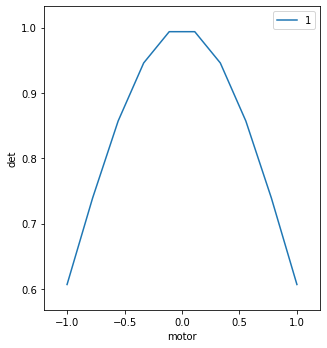

In [1]:
from bluesky import RunEngine
RE = RunEngine({})

from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

from ophyd.sim import det, motor
from bluesky.plans import scan
dets = [det]   # just one in this case, but it could be more than one

RE(scan(dets, motor, -1, 1, 10))